Read Data

In [36]:
import pandas as pd 

In [37]:
df = pd.read_csv("Ask A Manager Salary Survey 2021 (Responses) - Form Responses 1.csv")

Preprocessing

Preprocessing : Renaming Columns

In [38]:
df = df.rename(columns={
    "What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)": "Salary",
    "How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.": "AdditionalComp",
    "Please indicate the currency": "Currency",
    "How old are you?": "Age",
    "What industry do you work in?": "Industry",
    "Job title": "JobTitle",
    "What country do you work in?": "Country",
    "How many years of professional work experience do you have overall?": "ExperienceOverall",
    "How many years of professional work experience do you have in your field?": "ExperienceField",
    "What is your highest level of education completed?": "Education",
    "What is your gender?": "Gender",
    "What is your race? (Choose all that apply.)": "Race"
})

Preprocessing : String to Decimal

In [39]:
df["Salary"] = df["Salary"].str.replace(",", "").astype(float)
df["AdditionalComp"] = df["AdditionalComp"].astype(str).str.replace(",", "").replace("nan", None)
df["AdditionalComp"] = pd.to_numeric(df["AdditionalComp"], errors="coerce")

Preprocessing : Set Currency to USD

In [40]:
currency_rates = {
    'USD': 1.0,
    'GBP': 1.25,
    'EUR': 1.08,
    'CAD': 0.74,
    'AUD': 0.66,
    'INR': 0.012,
    'JPY': 0.0065,
    'SGD': 0.74,
    'MYR': 0.21,
    'IDR': 0.000065,
    
}

def convert_to_usd(row):
    rate = currency_rates.get(row['Currency'], None)
    if rate is not None:
        row['Salary'] = row['Salary'] * rate
        if not pd.isna(row['AdditionalComp']):
            row['AdditionalComp'] = row['AdditionalComp'] * rate
        row['Currency'] = 'USD'
    return row

df = df.apply(convert_to_usd, axis=1)

Preprocessing : Processing Multivariant Country Free Text

In [41]:
df['Country_cleaned'] = df['Country'].str.strip().str.lower()

In [42]:
import re

unique_locations = df["Country"].unique()


replacements = {
    'United States': [
        r'\bU\.?S\.?A?\.?\b', r'\bU\.S\.A\.?\b', r'\bU\.S\.?\.?\b',
        r'\bUsa\b', r'\bus\b', r'\bUS\b', r'\bUnited States\b',
        r'\bUnited states\b', r'\bUnited states of america\b',
        r'\bUnited States of America\b', r'\bAmerica\b',
        r'\bUnited Stated\b', r'\bUnited Statws\b', r'\bUnited Statues\b',
        r'\bUnited Stattes\b', r'\bUnited Statea\b', r'\bUSA\b',
        r'\busa\b', r'\bUNITED STATES\b', r'\bunited states\b',
        r'\bUnitedStates\b', r'\bUnited STates\b', r'\bUntied States\b',
        r'\bUnites States\b', r'\bUnited State\b', r'\bUnited Sates\b',
        r'\bUnite States\b', r'\bUnitef Stated\b', r'\bUnited Statss\b',
        r'\bUnited States is America\b', r'\bUS of A\b', r'\bUnited y\b',
        r'\bUSAB\b', r'\bUnited Stares\b', r'\bUSA tomorrow\b',
        r'\bU\. S\.?\b', r'\bU\.A\.\b', r'\bU\.S>\b', r'\bUSS\b',
        r'\bUSA-- Virgin Islands\b', r'\bUSaa\b', r'\buSA\b',
        r'\bUsa \b', r'\bUnited States of American\b',
        r'\bUnited States Of America\b'
    ],
    'United Kingdom': [
        r'\bUK\b', r'\buk\b', r'\bUk\b', r'\bU\.K\.?\b',
        r'\bUnited Kingdom\b', r'\bEngland\b', r'\bGreat Britain\b',
        r'\bScotland\b', r'\bWales\b', r'\bEngland/UK\b',
        r'\bUnited Kindom\b', r'\bUnited Kingdomk\b', r'\bU\.K. \(northern England\)\b',
        r'\bEngland, UK\b', r'\bEngland, United Kingdom\b',
        r'\bEngland, United Kingdom \b', r'\bEngland, Gb\b',
        r'\bNorthern Ireland\b', r'\bUK \(Northern Ireland\)\b',
        r'\bUnited kingdom\b', r'\bUnited kingdom \b', r'\bunited kingdom\b',
        r'\bScotland, UK\b', r'\bWales \(United Kingdom\)\b',
        r'\bUK, remote\b', r'\bUK, but for globally fully remote company\b',
        r'\bUK \(England\)\b'
    ],
    'Canada': [
        r'\bCanada\b', r'\bcanada\b', r'\bCanada, Ottawa, ontario\b',
        r'\bCanada and USA\b', r'\bCANADA\b', r'\bCANADA \b',
        r'\bCanadw\b', r'\bCsnada\b', r'\bCanad\b', r'\bCanadá\b'
    ],
    'Australia': [
        r'\bAustralia\b', r'\bAustralia \b', r'\baustralia\b',
        r'\bAustrali\b', r'\bAustralian \b'
    ],
    'Netherlands': [
        r'\bThe Netherlands\b', r'\bthe Netherlands\b', r'\bNetherlands\b',
        r'\bnetherlands\b', r'\bNetherlands \b', r'\bThe Netherlands \b',
        r'\bNederland\b', r'\bNL\b'
    ],
    'Germany': [
        r'\bGermany\b', r'\bGermany \b', r'\bgermany\b'
    ],
    'India': [
        r'\bIndia\b', r'\bindia\b', r'\bINDIA\b', r'\bibdia\b'
    ],
    'France': [
        r'\bFrance\b', r'\bFRANCE\b', r'\bfrance\b', r'\bFrance \b'
    ],
    'Mexico': [
        r'\bMexico\b', r'\bMexico \b', r'\bMéxico\b'
    ],
    'New Zealand': [
        r'\bNew Zealand\b', r'\bNew zealand\b', r'\bNZ\b',
        r'\bNew Zealand Aotearoa\b', r'\bAotearoa New Zealand\b',
        r'\bFrom New Zealand but on projects across APAC\b'
    ],
    'Singapore': [
        r'\bSingapore\b', r'\bsingapore\b', r'\bSingapore \b'
    ],
    'HongKong':[
        r'\bHong KongKong\b'
    ]
}

def normalize_location(loc):
    for standard, patterns in replacements.items():
        for pattern in patterns:
            if re.search(pattern, loc, re.IGNORECASE):
                return standard
    return loc.strip()

normalized_locations = [normalize_location(loc) for loc in unique_locations]
unique_normalized_locations = sorted(set(normalized_locations))

df['Country_cleaned'] = df['Country'].apply(normalize_location)


Preprocessing : Processing Multivariant Country with Fuzz

In [43]:
import re
from rapidfuzz import process, fuzz
import pycountry

In [44]:
valid_countries = [country.name for country in pycountry.countries]
valid_countries += ['United States', 'United Kingdom']  

def regex_normalize(loc):
    for standard, patterns in replacements.items():
        for pattern in patterns:
            if re.search(pattern, loc, re.IGNORECASE):
                return standard
    return None  # Not found

def fuzzy_match_country(loc, threshold=85):
    match = process.extractOne(loc, valid_countries, scorer=fuzz.ratio)
    if match and match[1] >= threshold:
        return match[0]
    return None

def normalize_location_full(loc):
    if not isinstance(loc, str):
        return None
    loc = loc.strip()
    
    norm = regex_normalize(loc)
    if norm:
        return norm
    
    return fuzzy_match_country(loc)

df['Country_cleaned'] = df['Country'].astype(str).apply(normalize_location_full)

df = df[df['Country_cleaned'].notnull()]


Preprocessing : Generalizing Multivariant Industries

In [45]:
df['Industry_cleaned'] = df['Industry'].str.strip().str.lower().fillna('')

def map_industry(industry):
    if any(x in industry for x in ['tech', 'software', 'it', 'developer', 'data', 'cyber']):
        return 'Tech'
    elif any(x in industry for x in ['finance', 'bank', 'accounting', 'investment', 'insurance']):
        return 'Finance'
    elif any(x in industry for x in ['health', 'hospital', 'medical', 'clinic', 'nurse', 'pharma']):
        return 'Healthcare'
    elif any(x in industry for x in ['education', 'school', 'university', 'teaching', 'academic', 'library', 'libraries','science', 'research']):
        return 'Education'
    elif any(x in industry for x in ['government', 'public administration', 'military']):
        return 'Government'
    elif any(x in industry for x in ['nonprofit', 'ngo', 'charity', 'social']):
        return 'Nonprofit'
    elif any(x in industry for x in ['retail', 'ecommerce', 'shopping', 'fashion']):
        return 'Retail'
    elif any(x in industry for x in ['media', 'entertainment', 'music', 'film','publishing']):
        return 'Media & Entertainment'
    elif any(x in industry for x in ['law', 'legal', 'attorney']):
        return 'Legal'
    elif any(x in industry for x in ['construction', 'real estate', 'architecture']):
        return 'Construction & Real Estate'
    elif any(x in industry for x in ['consulting', 'strategy', 'business']):
        return 'Consulting'
    elif any(x in industry for x in ['manufacturing', 'engineering', 'mechanical']):
        return 'Engineering & Manufacturing'
    elif any(x in industry for x in ['transport', 'logistics', 'supply chain']):
        return 'Logistics'
    elif any(x in industry for x in ['marketing','advertising','sales']):
        return 'Marketing'
    elif any(x in industry for x in ['art', 'design']):
        return 'Art & Design'
    elif any(x in industry for x in ['agriculture', 'forestry']):
        return 'Agriculture'
    
    else:
        return 'Other'

df['Industry_grouped'] = df['Industry_cleaned'].apply(map_industry)

print(df['Industry_grouped'].value_counts())

Industry_grouped
Tech                           9390
Education                      3764
Finance                        2351
Healthcare                     2099
Government                     1917
Engineering & Manufacturing    1768
Marketing                      1426
Legal                          1097
Other                           944
Consulting                      891
Retail                          515
Construction & Real Estate      450
Art & Design                    370
Media & Entertainment           337
Logistics                       315
Nonprofit                       274
Agriculture                     138
Name: count, dtype: int64


In [46]:
df['JobTitle_cleaned'] = df['JobTitle'].astype(str).str.strip().str.lower().fillna('')


Preprocessing : Generalizing Multivariant Job Title

In [47]:
def map_job_title(title):
    title = str(title).lower()
    if any(x in title for x in ['ceo', 'cfo','cto','director','chief', 'executive', 'president', 'vp', 'vice','head']):
        return 'Executive'
    elif any(x in title for x in ['coordinator','manager', 'supervisor', 'lead','senior']):
        return 'Management'
    elif any(x in title for x in ['computer','agile','scrum','engineer', 'developer', 'programmer', 'software', 'tech', 'technician', 'it']):
        return 'Engineering & IT'
    elif any(x in title for x in ['data', 'analyst', 'scientist', 'analytics','statistician']):
        return 'Data & Analytics'
    elif any(x in title for x in ['designer','artist','graphic','design']):
        return 'Creative Arts'
    elif any(x in title for x in ['school','teaching','Bookkeeper','lecturer','library','librarian','teacher', 'instructor', 'educator', 'professor', 'tutor', 'trainer', 'instructional','education','research']):
        return 'Education & Training'
    elif any(x in title for x in ['outreach','pr','marketing', 'brand', 'communications', 'content', 'seo','reporter']):
        return 'Marketing & Communications'
    elif any(x in title for x in ['sales', 'account executive', 'business development']):
        return 'Sales'
    elif any(x in title for x in ['hr', 'human resources', 'recruiter', 'talent']):
        return 'Human Resources'
    elif any(x in title for x in ['archivist','admin', 'administrative', 'office', 'clerk','associate']):
        return 'Administrative'
    elif any(x in title for x in ['risk','payroll','finance', 'accounting', 'accountant', 'cpa', 'auditor','economist','buyer']):
        return 'Finance & Accounting'
    elif any(x in title for x in ['legal', 'lawyer', 'attorney', 'paralegal','compliance','advocate']):
        return 'Legal'
    elif any(x in title for x in ['dental','clinician','surgeon','clinical','psychiatrist','veterinary','optometrist','veterinarian','pharmacist','nurse', 'doctor', 'physician', 'medical', 'health','therapist']):
        return 'Healthcare'
    elif any(x in title for x in ['counsel','consultant', 'consulting', 'advisor','psychologist','adviser']):
        return 'Consulting'
    elif any(x in title for x in ['customer service', 'support', 'help desk']):
        return 'Customer Service'
    elif any(x in title for x in ['producer','project', 'program','partner','assistant']):
        return 'Project & Program Management'
    elif any(x in title for x in ['owner']):
        return 'Entrepreneur'
    elif any(x in title for x in ['biologist', 'epidemiologist','geologist','archaeologist','biostatistician','chemist','astronomer','sciences','ecologist','scientific']):
        return 'Researcher & Scientist'
    elif any(x in title for x in ['journalist','reporter','media','author']):
        return 'News & Media'
    elif any(x in title for x in ['translator']):
        return 'Language Expert'
    elif any(x in title for x in ['assistant','controller','worker']):
        return 'Assistant'
    elif any(x in title for x in ['intern','student']):
        return 'Intern'
    elif any(x in title for x in ['planner','strategist','planning','investigator','predictor','specialist','tester']):
        return 'Strategist'
    else:
        return 'Other'

df['JobTitle_grouped'] = df['JobTitle_cleaned'].apply(map_job_title)

df['JobTitle_grouped'].value_counts()


JobTitle_grouped
Management                      9216
Executive                       4490
Engineering & IT                4103
Education & Training            1620
Data & Analytics                1606
Administrative                  1220
Other                           1146
Marketing & Communications       992
Legal                            514
Consulting                       512
Strategist                       502
Healthcare                       440
Creative Arts                    331
Finance & Accounting             282
Human Resources                  265
Project & Program Management     247
Assistant                        140
Sales                            107
Researcher & Scientist           100
Intern                            71
Customer Service                  67
News & Media                      42
Entrepreneur                      17
Language Expert                   16
Name: count, dtype: int64

Preprocessing : Filtering Columns to Make It Simpler

In [48]:
selected_columns = ["Age","Industry_grouped","JobTitle_grouped","Salary","AdditionalComp","Country_cleaned","ExperienceOverall","ExperienceField","Education","Gender","Race"]
df = df[selected_columns]
df = df[df["Country_cleaned"]=="United States"]


Exploratory Data Analysis

In [49]:
df.info()
df.isnull().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
Index: 23222 entries, 0 to 28134
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                23222 non-null  object 
 1   Industry_grouped   23222 non-null  object 
 2   JobTitle_grouped   23222 non-null  object 
 3   Salary             23222 non-null  float64
 4   AdditionalComp     17406 non-null  float64
 5   Country_cleaned    23222 non-null  object 
 6   ExperienceOverall  23222 non-null  object 
 7   ExperienceField    23222 non-null  object 
 8   Education          23066 non-null  object 
 9   Gender             23080 non-null  object 
 10  Race               23072 non-null  object 
dtypes: float64(2), object(9)
memory usage: 2.1+ MB


AdditionalComp       5816
Education             156
Race                  150
Gender                142
Age                     0
Industry_grouped        0
JobTitle_grouped        0
Salary                  0
Country_cleaned         0
ExperienceOverall       0
ExperienceField         0
dtype: int64

In [50]:
import seaborn as sns

c:\Users\natha\Downloads\Computational_Physics\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Salary', ylabel='Count'>

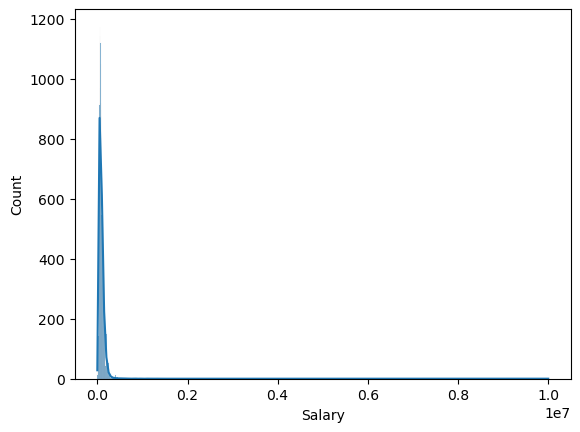

In [51]:
sns.histplot(df['Salary'], kde=True)

c:\Users\natha\Downloads\Computational_Physics\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='AdditionalComp', ylabel='Count'>

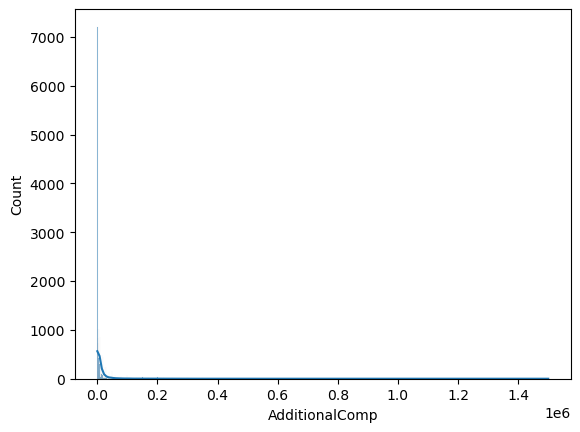

In [52]:
sns.histplot(df['AdditionalComp'].dropna(), kde=True)

<Axes: xlabel='Age'>

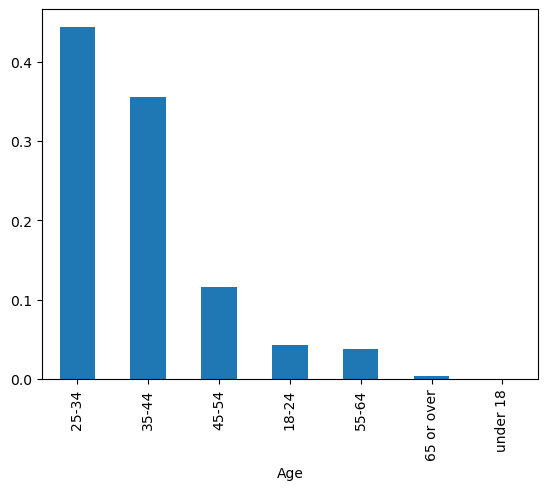

In [53]:
df['Age'].value_counts(normalize=True).plot(kind='bar')


<Axes: xlabel='Age', ylabel='Salary'>

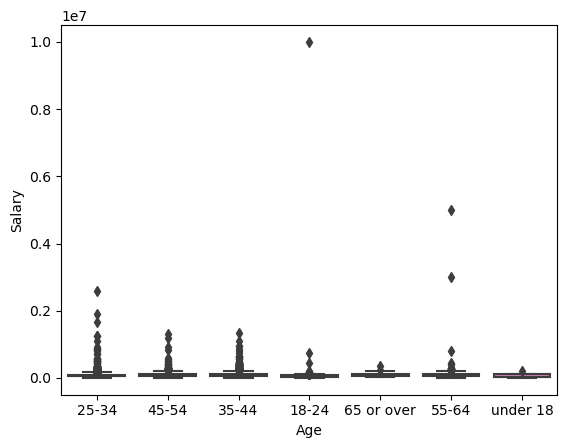

In [54]:
sns.boxplot(data=df, x='Age', y='Salary')


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Education & Training'),
  Text(1, 0, 'Marketing & Communications'),
  Text(2, 0, 'Management'),
  Text(3, 0, 'Data & Analytics'),
  Text(4, 0, 'Executive'),
  Text(5, 0, 'Legal'),
  Text(6, 0, 'Engineering & IT'),
  Text(7, 0, 'Other'),
  Text(8, 0, 'Administrative'),
  Text(9, 0, 'Strategist')])

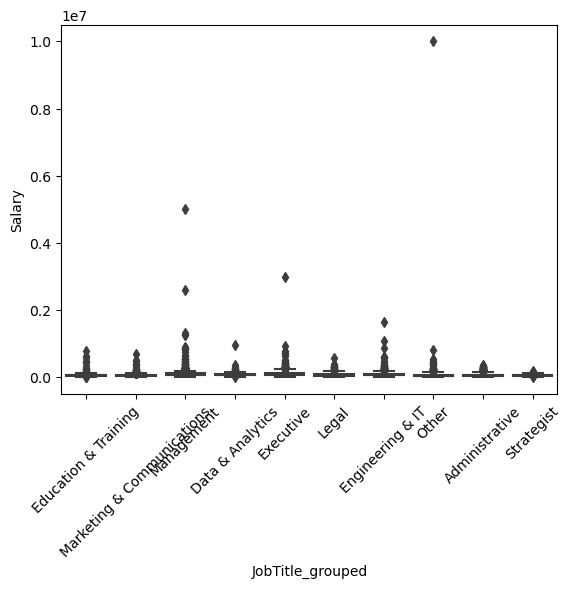

In [55]:
from matplotlib import pyplot as plt
top_jobs = df['JobTitle_grouped'].value_counts().head(10).index
sns.boxplot(data=df[df['JobTitle_grouped'].isin(top_jobs)], x='JobTitle_grouped', y='Salary')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, "Master's degree"),
  Text(1, 0, 'College degree'),
  Text(2, 0, 'PhD'),
  Text(3, 0, 'Some college'),
  Text(4, 0, 'High School'),
  Text(5, 0, 'Professional degree (MD, JD, etc.)')])

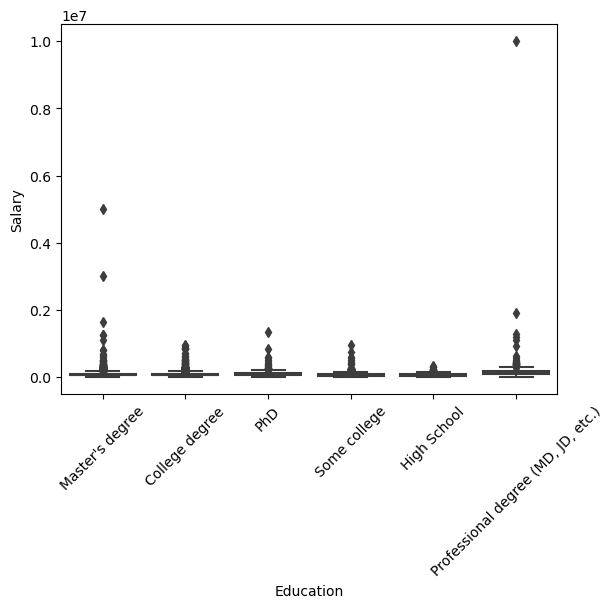

In [56]:
sns.boxplot(data=df, x='Education', y='Salary')
plt.xticks(rotation=45)

<Axes: xlabel='ExperienceOverall', ylabel='Salary'>

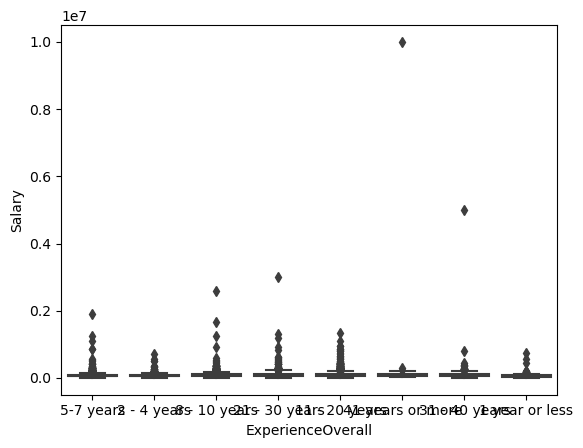

In [57]:
sns.boxplot(data=df, x='ExperienceOverall', y='Salary')

Preprocessing : Handle Missing Values with 0 for Numerical, and Mode for Categorical

In [58]:
df["AdditionalComp"] = df["AdditionalComp"].fillna(0)
df["Education"] = df["Education"].fillna(df["Education"].mode().iloc[0])
df["Gender"] = df["Gender"].fillna(df["Gender"].mode().iloc[0])
df["Race"] = df["Race"].fillna(df["Race"].mode().iloc[0])


Preprocessing : Encoding High Cardinality Features with Target Encoder

In [59]:
import category_encoders as ce
high_card_cols = ['Industry_grouped', 'JobTitle_grouped', 'Country_cleaned',"Race"]
df['TotalComp'] = df['Salary'] + df['AdditionalComp']
encoder = ce.TargetEncoder(cols=high_card_cols)
df_encoded = encoder.fit_transform(df[high_card_cols], df['TotalComp'])

df[high_card_cols] = df_encoded

print(df.head())

     Age  Industry_grouped  JobTitle_grouped   Salary  AdditionalComp  \
0  25-34      68272.613658      69165.859216  55000.0             0.0   
2  25-34     106426.733813      78926.129630  34000.0             0.0   
3  25-34     117720.379088     107495.913257  62000.0          3000.0   
4  25-34     106426.733813     107495.913257  60000.0          7000.0   
5  25-34      68272.613658      69165.859216  62000.0             0.0   

   Country_cleaned ExperienceOverall ExperienceField        Education Gender  \
0    101854.580441         5-7 years       5-7 years  Master's degree  Woman   
2    101854.580441       2 - 4 years     2 - 4 years   College degree  Woman   
3    101854.580441      8 - 10 years       5-7 years   College degree  Woman   
4    101854.580441      8 - 10 years       5-7 years   College degree  Woman   
5    101854.580441      8 - 10 years     2 - 4 years  Master's degree    Man   

            Race  TotalComp  
0  100386.418338    55000.0  
2  100386.418338    

Preprocessing : Encoding Ordinal Features with OrdinalEncoder

In [60]:
from sklearn.preprocessing import OrdinalEncoder

# Define the custom order for each ordinal column
age_order = ['under 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65 or over']
experience_order = [
    '1 year or less', '2 - 4 years', '5-7 years', '8 - 10 years',
    '11 - 20 years', '21 - 30 years', '31 - 40 years', '41 years or more'
]
education_order = [
    'High School', 'Some college', 'College degree', "Master's degree",
    'Professional degree (MD, JD, etc.)', 'PhD'
]

# Specify the columns and corresponding categories in order
ordinal_cols = ['Age', 'ExperienceOverall', 'ExperienceField', 'Education']
categories = [age_order, experience_order, experience_order, education_order]

# Initialize and apply the OrdinalEncoder
encoder = OrdinalEncoder(categories=categories)
df[ordinal_cols] = encoder.fit_transform(df[ordinal_cols])

# Result
print(df[ordinal_cols].head())


   Age  ExperienceOverall  ExperienceField  Education
0  2.0                2.0              2.0        3.0
2  2.0                1.0              1.0        2.0
3  2.0                3.0              2.0        2.0
4  2.0                3.0              2.0        2.0
5  2.0                3.0              1.0        3.0


Preprocessing : Encoding Gender Feature with OneHotEncoder

In [61]:
df = pd.get_dummies(df, columns=['Gender'], prefix='Gender')

Preprocessing : Binning Salary & Additional Compensation to Increase Accuracy

In [62]:
df['Salary_binned'] = pd.qcut(df['Salary'], q=5, labels=False)
df['AdditionalComp_binned'] = pd.cut(df['AdditionalComp'], bins=5, labels=False)

In [63]:
bins = pd.qcut(df['Salary'], q=5)

print("Kategori dan range:")
print(bins.cat.categories)

Kategori dan range:
IntervalIndex([(-0.001, 52000.0], (52000.0, 70000.0], (70000.0, 90000.0], (90000.0, 122990.0], (122990.0, 10000000.0]], dtype='interval[float64, right]')


In [64]:
bins = pd.cut(df['AdditionalComp'], bins=5)

print("Kategori dan range:")
print(bins.cat.categories)

Kategori dan range:
IntervalIndex([(-1500.0, 300000.0], (300000.0, 600000.0], (600000.0, 900000.0], (900000.0, 1200000.0], (1200000.0, 1500000.0]], dtype='interval[float64, right]')


Model Selection

In [65]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score



Model : Split Data 

In [66]:
X = df.drop(columns=['Salary', 'AdditionalComp', 'TotalComp', 'Salary_binned', 'AdditionalComp_binned'])
y = df[['Salary_binned', 'AdditionalComp_binned']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model : Normalization with StandardScaler

In [67]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Model : Dimensional Reduction with PCA

In [68]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

Model : Model and Grid Parameter

In [69]:
param_grids = {
    "RandomForest": {
        "estimator__n_estimators": [50, 100],
        "estimator__max_depth": [None, 10],
    },
    "GradientBoosting": {
        "estimator__n_estimators": [50, 100],
        "estimator__learning_rate": [0.05, 0.1],
    },
    "XGBoost": {
        "estimator__n_estimators": [50, 100],
        "estimator__learning_rate": [0.05, 0.1],
        "estimator__max_depth": [3, 6],
    }
}

base_models = {
    "RandomForest": MultiOutputClassifier(RandomForestClassifier(random_state=42)),
    "GradientBoosting": MultiOutputClassifier(GradientBoostingClassifier(random_state=42)),
    "XGBoost": MultiOutputClassifier(XGBClassifier(random_state=42, verbosity=0)),
}

results = {}
trained_models = {}
for name, base_model in base_models.items():
    print(f"Tuning {name}...")
    grid = GridSearchCV(base_model, param_grids[name], cv=3, n_jobs=-1, scoring='accuracy')
    grid.fit(X_train_pca, y_train)
    best_model = grid.best_estimator_
    trained_models[name] = best_model
    y_pred = best_model.predict(X_test_pca)

    salary_acc = accuracy_score(y_test['Salary_binned'], y_pred[:, 0])
    addcomp_acc = accuracy_score(y_test['AdditionalComp_binned'], y_pred[:, 1])
    
    results[name] = {
        "Salary Accuracy": salary_acc,
        "AdditionalComp Accuracy": addcomp_acc,
        "Avg Accuracy": (salary_acc + addcomp_acc) / 2
    }

results_df = pd.DataFrame(results).T
print(results_df)

Tuning RandomForest...


c:\Users\natha\Downloads\Computational_Physics\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(


Tuning GradientBoosting...


c:\Users\natha\Downloads\Computational_Physics\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(


Tuning XGBoost...


c:\Users\natha\Downloads\Computational_Physics\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan]
  warnings.warn(


                  Salary Accuracy  AdditionalComp Accuracy  Avg Accuracy
RandomForest             0.310011                 0.997201      0.653606
GradientBoosting         0.302045                 0.996555      0.649300
XGBoost                  0.301830                 0.996771      0.649300


Evaluation : Accuracy Score and Classification Report

In [70]:
results_df["Avg Accuracy"] = (results_df["Salary Accuracy"] + results_df["AdditionalComp Accuracy"])/2
best_model_name = results_df['Avg Accuracy'].idxmax()
best_model = trained_models[best_model_name]

print(f"\nBest model: {best_model_name}")
print(f"Best accuracy: {results_df.loc[best_model_name, 'Avg Accuracy']:.4f}")

y_pred = best_model.predict(X_test_pca)

print("=== Salary Classification Report ===")
print(classification_report(y_test['Salary_binned'], y_pred[:, 0]))

print("=== Additional Compensation Classification Report ===")
print(classification_report(y_test['AdditionalComp_binned'], y_pred[:, 1]))


Best model: RandomForest
Best accuracy: 0.6536
=== Salary Classification Report ===
              precision    recall  f1-score   support

           0       0.37      0.36      0.36       930
           1       0.28      0.26      0.27      1042
           2       0.22      0.22      0.22       918
           3       0.24      0.23      0.24       808
           4       0.41      0.48      0.44       947

    accuracy                           0.31      4645
   macro avg       0.30      0.31      0.31      4645
weighted avg       0.31      0.31      0.31      4645

=== Additional Compensation Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4630
           1       1.00      0.09      0.17        11
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       1.00      1.00      1.00         1

    accuracy                           1.00   

c:\Users\natha\Downloads\Computational_Physics\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\natha\Downloads\Computational_Physics\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\natha\Downloads\Computational_Physics\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [ ]:
target_encoder = ce.TargetEncoder(cols=high_card_cols)
df_encoded = target_encoder.fit_transform(df[high_card_cols], df['TotalComp'])

In [ ]:
ordinal_encoder = OrdinalEncoder(categories=categories)

In [ ]:

# === SAVE ALL COMPONENTS ===
# Save components individually to avoid pickle issues
print("\nSaving model components...")

# Save the main model
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)
print("✓ Model saved")

# Save scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)
print("✓ Scaler saved")

# Save PCA
with open("pca.pkl", "wb") as f:
    pickle.dump(pca, f)
print("✓ PCA saved")

# Save target encoder
with open("target_encoder.pkl", "wb") as f:
    pickle.dump(target_encoder, f)
print("✓ Target encoder saved")

# Save ordinal encoder
with open("ordinal_encoder.pkl", "wb") as f:
    pickle.dump(ordinal_encoder, f)
print("✓ Ordinal encoder saved")

# Save metadata (feature columns, results, etc.)
metadata = {
    'feature_columns': list(X.columns),
    'results': results,
    'best_model_name': best_model_name,
    'target_columns': ['Salary_binned', 'AdditionalComp_binned'],
    'high_card_cols': high_card_cols,
    'ordinal_cols': ordinal_cols,
    'categories': {
        'age_order': age_order,
        'experience_order': experience_order, 
        'education_order': education_order
    }
}

with open("model_metadata.pkl", "wb") as f:
    pickle.dump(metadata, f)
print("✓ Metadata saved")

# Create a combined components file (alternative approach)
try:
    model_components = {
        'model': best_model,
        'scaler': scaler,
        'pca': pca,
        'target_encoder': category_encoders,
        'ordinal_encoder': OrdinalEncoder,
        'metadata': metadata
    }
    
    with open("model_components.pkl", "wb") as f:
        pickle.dump(model_components, f)
    print("✓ Combined components file saved")
    
    # Verify the saved model works
    print("\nVerifying saved model...")
    with open("model_components.pkl", "rb") as f:
        loaded_components = pickle.load(f)
    
    # Test prediction on one sample
    test_pred = loaded_components['model'].predict(X_test_pca[:1])
    print(f"Test prediction: Salary tier {test_pred[0][0]}, AddComp tier {test_pred[0][1]}")
    print("✓ Model verification successful!")
    
except Exception as e:
    print(f"Warning: Could not save combined file: {e}")
    print("Individual component files are saved and can be used instead.")

print(f"\nAll components saved successfully!")
print(f"Best model: {best_model_name}")
print(f"Best accuracy: {results_df.loc[best_model_name, 'Avg Accuracy']:.4f}")
print("You can now use the Streamlit app for predictions!")


Saving model components...
✓ Model saved
✓ Scaler saved
✓ PCA saved
✓ Target encoder saved
✓ Ordinal encoder saved
✓ Metadata saved
Individual component files are saved and can be used instead.

All components saved successfully!
Best model: RandomForest
Best accuracy: 0.6536
You can now use the Streamlit app for predictions!
